# Метод опорных векторов (SCM support vecctor machine)
Это разделяющая классификация - разделяет классы данных некой кривой

Линий много и выбирают ту, у которой максимальный отступ


In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

iris = sns.load_dataset('iris')

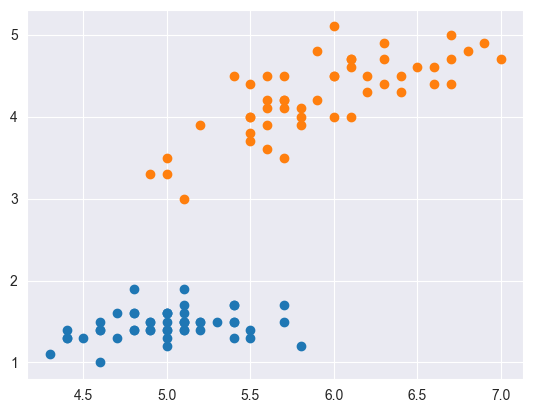

In [74]:
data = iris[['sepal_length', 'petal_length', 'species']]
data_df = data[(data['species']=='setosa') | (data['species']== 'versicolor')]

X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

data_df_setosa = data_df[data_df['species'] == 'setosa']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

plt.scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

plt.show()

In [ ]:
model = SVC(kernel = 'linear', C=10000)
model.fit(X, y)

In [ ]:
plt.scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=400, facecolor='None', edgecolors='black')
plt.show()

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])
X_p['species'] = model.predict(X_p)

X_p_setosa = X_p[X_p['species'] == 'setosa']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

plt.scatter(X_p_setosa['sepal_length'], X_p_setosa['petal_length'], alpha=0.1)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.1)

plt.show()

In [ ]:
#ДЗ Убрать из данных Iris часть точек, на которых мы обучаемся и убедиться в отсуутствии изменений

In [22]:
#А если группы деляться плохо
data = iris[['sepal_length', 'petal_length', 'species']]
data_df = data[(data['species']=='virginica') | (data['species']== 'versicolor')]

X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

data_df_virginica = data_df[data_df['species'] == 'virginica']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']



In [35]:
#В случае перекрытия данных не существует идеальной границы. У модели есть гиперпараметр, который определяет размытие отступа и разрешает некоторым точкам в него заходить

#Если C большое,то оттуп задаётся жестко
model = SVC(kernel = 'linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

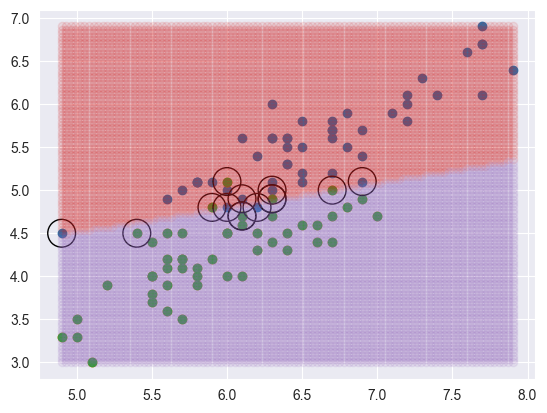

In [36]:
plt.scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])
X_p['species'] = model.predict(X_p)

plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=400, facecolor='None', edgecolors='black')

X_p_virginica = X_p[X_p['species'] == 'virginica']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

plt.scatter(X_p_virginica['sepal_length'], X_p_virginica['petal_length'], alpha=0.1)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.1)

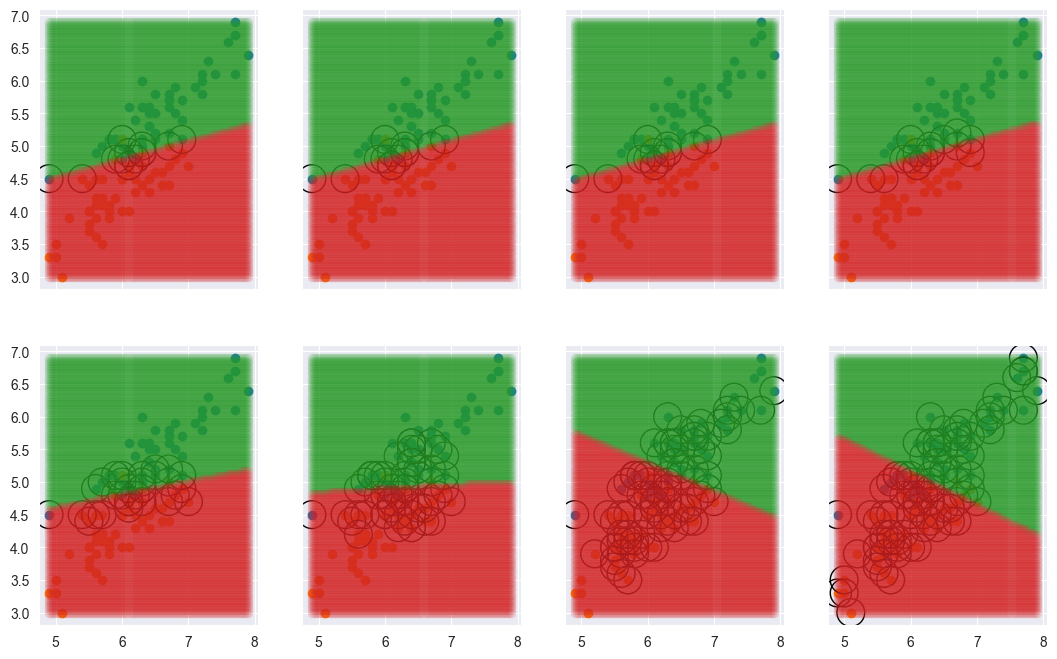

In [51]:
c_value = [[10000, 1000, 100, 10], [1, 0.1, 0.01, 0.001]]
fig, ax = plt.subplots(2, 4, figsize=(13, 8), sharex='col', sharey='row')

for i in range(2):
    for j in range(4):
        ax[i,j].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
        ax[i,j].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])
        model = SVC(kernel = 'linear', C=c_value[i][j])
        model.fit(X, y)
        ax[i,j].scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=400, facecolor='None', edgecolors='black')
        x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
        x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

        X1_p, X2_p = np.meshgrid(x1_p, x2_p)
        X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])
        X_p['species'] = model.predict(X_p)

        X_p_virginica = X_p[X_p['species'] == 'virginica']
        X_p_versicolor = X_p[X_p['species'] == 'versicolor']

        ax[i,j].scatter(X_p_virginica['sepal_length'], X_p_virginica['petal_length'], alpha=0.1)
        ax[i,j].scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.1)





### Достоинства
При большом C мало опорных векторов и модель более компактная. Предсказания проходят быстро. На работу влияют точки, находящиеся возле отступов. Подходит для многомерных данных

### Недостатки
- При большом количестве обучающих образцов могут быть значительные вычислительные затраты
- Большая зависимости от параметра размытости. Поиск приведёт к большим вычислительным затратам
- У результатов отсутствует вероятностная интепритация.

# Деревья решений и случайные леса

СЛ - это непараметрический алгоритм.
СЛ - это пример ансамблевого метода, основанно на агрегации результотов множества простых моделей

В реализациях дерева принятия решений в машинном обучении вопросы идут к разделению данных по осям. Каждый узел разбивает данные на две группы по одному из признаков

In [97]:
species_int = []
for r in iris.values:
    match r[4]:
        case 'setosa':
            species_int.append(1)
        case 'versicolor':
            species_int.append(2)
        case 'virginica':
            species_int.append(3)

species_int_df = pd.DataFrame(species_int)
data = iris[['sepal_length', 'petal_length']]
data['species'] = species_int_df
print(data)
data_df = data[(data['species']==3) | (data['species']== 2)]

X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

data_df_virginica = data_df[data_df['species'] == 3]
data_df_versicolor = data_df[data_df['species'] == 2]

     sepal_length  petal_length  species
0             5.1           1.4        1
1             4.9           1.4        1
2             4.7           1.3        1
3             4.6           1.5        1
4             5.0           1.4        1
..            ...           ...      ...
145           6.7           5.2        3
146           6.3           5.0        3
147           6.5           5.2        3
148           6.2           5.4        3
149           5.9           5.1        3

[150 rows x 3 columns]


C:\Users\huawei\AppData\Local\Temp\ipykernel_15692\1706740175.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species'] = species_int_df


In [98]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X,y)

DecisionTreeClassifier(max_depth=3)

C:\Users\huawei\AppData\Local\Temp\ipykernel_15692\821294146.py:12: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=2, cmap='rainbow', zorder=1)


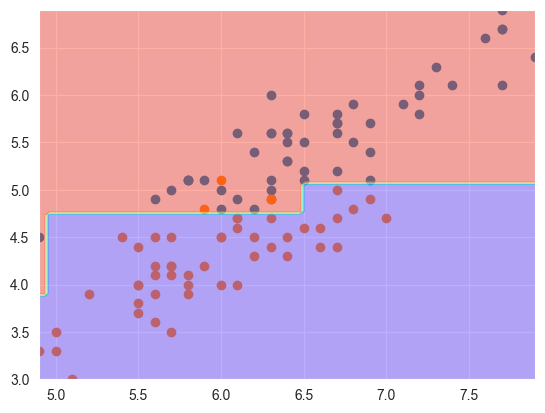

In [99]:
plt.scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])
y_P = model.predict(X_p)
X_p['species'] = y_P

plt.contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=2, cmap='rainbow', zorder=1)
plt.show()

C:\Users\huawei\AppData\Local\Temp\ipykernel_15692\939168642.py:14: UserWarning: The following kwargs were not used by contour: 'level'
  ax[i,j].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=2, cmap='rainbow', zorder=1)
C:\Users\huawei\AppData\Local\Temp\ipykernel_15692\939168642.py:14: UserWarning: The following kwargs were not used by contour: 'level'
  ax[i,j].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=2, cmap='rainbow', zorder=1)
C:\Users\huawei\AppData\Local\Temp\ipykernel_15692\939168642.py:14: UserWarning: The following kwargs were not used by contour: 'level'
  ax[i,j].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=2, cmap='rainbow', zorder=1)
C:\Users\huawei\AppData\Local\Temp\ipykernel_15692\939168642.py:14: UserWarning: The following kwargs were not used by contour: 'level'
  ax[i,j].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=2, cmap='rainbow', zorder=1)
C:\Users\huawei\AppData\Local\Temp\ipyke

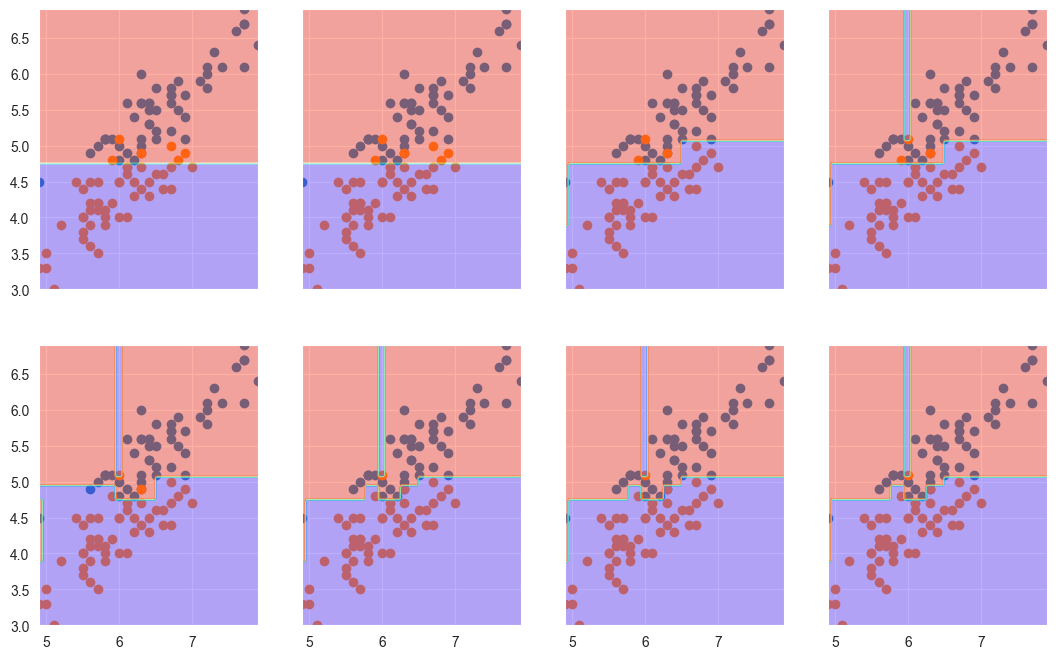

In [103]:
c_value = [[1, 2, 3, 4], [5, 6, 7, 8]]
fig, ax = plt.subplots(2, 4, figsize=(13, 8), sharex='col', sharey='row')

for i in range(2):
    for j in range(4):
        ax[i,j].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
        ax[i,j].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])
        model = DecisionTreeClassifier(max_depth=c_value[i][j])
        model.fit(X, y)
        x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
        x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)
        X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])
        y_P = model.predict(X_p)
        ax[i,j].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=2, cmap='rainbow', zorder=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

iris = sns.load_dataset('iris')

In [ ]:
species_int = []
for r in iris.values:
    match r[4]:
        case 'setosa':
            species_int.append(1)
        case 'versicolor':
            species_int.append(2)
        case 'virginica':
            species_int.append(3)

species_int_df = pd.DataFrame(species_int)
data = iris[['sepal_length', 'petal_length']]
data['species'] = species_int_df

data_df_setosa = data[data['species'] == 1]
data_df_versicolor = data[data['species'] == 2]
data_df_virginica = data[data['species'] == 3]

data_df_versicolor_A = data_df_versicolor.iloc[:25, :]
data_df_versicolor_B = data_df_versicolor.iloc[25:, :]

data_df_virginica_A = data_df_virginica.iloc[:25, :]
data_df_virginica_B = data_df_virginica.iloc[25:, :]

data_df_A = pd.concat([data_df_virginica_A, data_df_versicolor_A], ignore_index=True)
data_df_B = pd.concat([data_df_virginica_B, data_df_versicolor_B], ignore_index=True)

x1_p = np.linspace(min(data['sepal_length']), max(data['sepal_length']), 100)
x2_p = np.linspace(min(data['petal_length']), max(data['petal_length']), 100)
X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])

In [ ]:
fig, ax = plt.subplots(2,4, sharex='col', sharey='row', figsize=(13, 8))

max_depth = [1, 3, 5, 7]
X = data_df_A[['sepal_length', 'petal_length']]
y = data_df_A['species']
j=0
for md in max_depth:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X, y)

    ax[0, j].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
    ax[0, j].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

    y_P = model.predict(X_p)
    ax[0,j].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=2, cmap='rainbow', zorder=1)
    j+=1

X = data_df_B[['sepal_length', 'petal_length']]
y = data_df_B['species']
j=0
for md in max_depth:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X, y)

    ax[1, j].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
    ax[1, j].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

    y_P = model.predict(X_p)
    ax[1,j].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=2, cmap='rainbow', zorder=1)
    j+=1